<a href="https://colab.research.google.com/github/AirPro/DeepLearning/blob/Module2Assignment/Module2Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module Two Hands On Assignment
January 25, 2023 <br>
By: Robert Freid for Deep Learning Class

In [6]:
# import modules and libraries
import numpy as np
import matplotlib.pyplot as plt

## Use the Fashion MNIST dataset named fashion_mnist
Load the data from Repository <br>
Display the shape ofnthe dataset

In [7]:
# import the Fashion_Mnist dataset from Keras
from tensorflow.keras.datasets import fashion_mnist

# Save the training set in X_Train and X_Test and the testing data in y_train and y_test
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# display the shape of the imported dataset
print("X_train shape = ", X_train.shape)
print("y_train shape = ", y_train.shape)
print("X_test shape = ", X_test.shape)
print("y_test shape = ", y_test.shape)

X_train shape =  (60000, 28, 28)
y_train shape =  (60000,)
X_test shape =  (10000, 28, 28)
y_test shape =  (10000,)


## Plot the image at location 2351 in the dataset using the pyplot library.

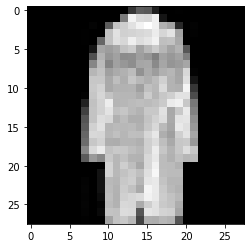

In [8]:
# image at location 2351
plt.imshow(X_train[2351], cmap = plt.get_cmap('gray'))

## Perform the requirement to preprocess the dataset

In [9]:
# change integers to 32-bit floating point numbers
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize each value for each pixel for the entire vector for each input
X_train /= 255
X_test /= 255

# Reshape the datasets which allows adding or removing demensions in an array
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000, 28,28,1)

# Verify using print fuction datasets
print("Training matrix shape: ", X_train.shape)
print("Testing matrix shape: ", X_test.shape)



Training matrix shape:  (60000, 28, 28, 1)
Testing matrix shape:  (10000, 28, 28, 1)


In [10]:
# Preparing the labels by converting them to one-hot-encoder

from keras.utils import np_utils

# number of unique digits in the MNIST dataset
nb_classes = 10

# convert the Y_train and y_test to one-hot-encoding
y_train = np_utils.to_categorical(y_train, nb_classes )
y_test = np_utils.to_categorical(y_test, nb_classes)

# display the shape of the converted datasets
print("Training labels shape: ", y_train.shape)
print("Testing labels shape: ", y_test.shape)

Training labels shape:  (60000, 10)
Testing labels shape:  (10000, 10)
